### Problem Statement 

To predict vehicle pricing based on design, performance, and temporal factors.

- **Design and Performance:** Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven Wheels, Number of Doors, Vehicle Size, Vehicle Style.

- **Market and Timing:** Make, Model, Year, Market Category, highway MPG, city mpg

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

#Handling categorical variables 
from sklearn.preprocessing import LabelEncoder

#For data modeling 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#For Metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.tree import plot_tree


In [3]:
df = pd.read_csv('dataset.csv')


In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df['MSRP'].unique()

array([46135, 40650, 36350, ..., 46120, 50620, 50920], dtype=int64)

In [6]:
df['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

### Checking for descriptive statistics

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,12000.000000,11931.000000,11970.000000,11994.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,2010.366417,249.212304,5.626149,3.433967,26.652583,19.731667,1562.599750,4.047974e+04
std,7.610080,108.942442,1.776181,0.882499,8.843787,8.958944,1444.032657,5.992542e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.217625e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Some analysis from the given data

- The Engine HP and MSRP columns have high variability, with outliers that influence their distributions.

- Fuel efficiency (both city and highway MPG) shows a fairly wide range where there are some cars being much more efficient than others.

- Engine Cylinders show a more uniform distribution, with a reasonable spread from 0 to 16.

- The average highway MPG efficiency is 26.53 MPG, but there is notable variation (std: 7.78). The maximum value of 354 MPG stands out as an outlier, suggesting there are some exceptionally fuel-efficient vehicles in the dataset.

In [8]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Checking various datatypes

In [9]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

- We can see that this dataset contains various numerical and categorical datatypes.

In [10]:
df.shape

(12000, 16)

This shows we have total of 12000 rows and 16 columns

## 2. Handling missing values

### Checking for null value percentages

In [11]:
missing_value_df = df.isnull().mean()*100
missing_value_df

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025000
Engine HP             0.575000
Engine Cylinders      0.250000
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050000
Market Category      31.183333
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

### Visualizing missing values

C:\Users\nirma\AppData\Local\Temp\ipykernel_8344\457968786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_value_df, palette='Reds')


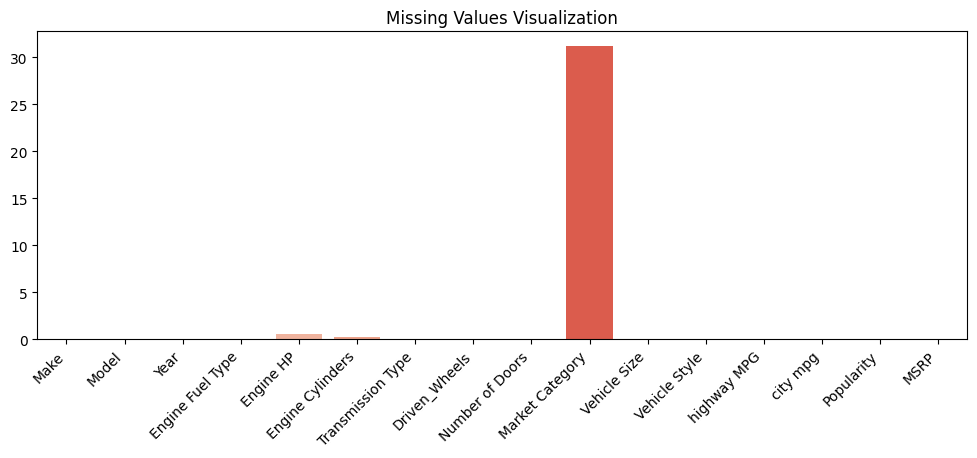

In [12]:
plt.figure(figsize=(12,4))
sns.barplot(data=missing_value_df, palette='Reds')
plt.title('Missing Values Visualization')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

## Insights

- Among these, the missing values in the Market Category column are the highest, accounting for approximately 31.18%.



In [13]:
#Checking for various available columns 
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [14]:
df.shape

(12000, 16)

#### Dropping missing values max missing values

In [15]:
df.drop(columns = 'Market Category',axis  = 1, inplace = True)

In [16]:
df.dropna(axis = 0 , inplace = True)

In [17]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

##  Data Duplication handling

### Check for any duplicates in the entries

In [18]:
df.duplicated().sum()

806

- This shows 435 rows contain duplicates.


### Dropping duplicates

In [19]:

df = df.drop_duplicates()


- Duplicates need to be removed to avoid bias and incorrect statistical analysis and also to ensure accuracy in analysis and modeling.

## Null value handling

In [20]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

- As we have already handled missing values, this shows that there are no any missing values now.

## Outlier detection and graphical presentation

In [21]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

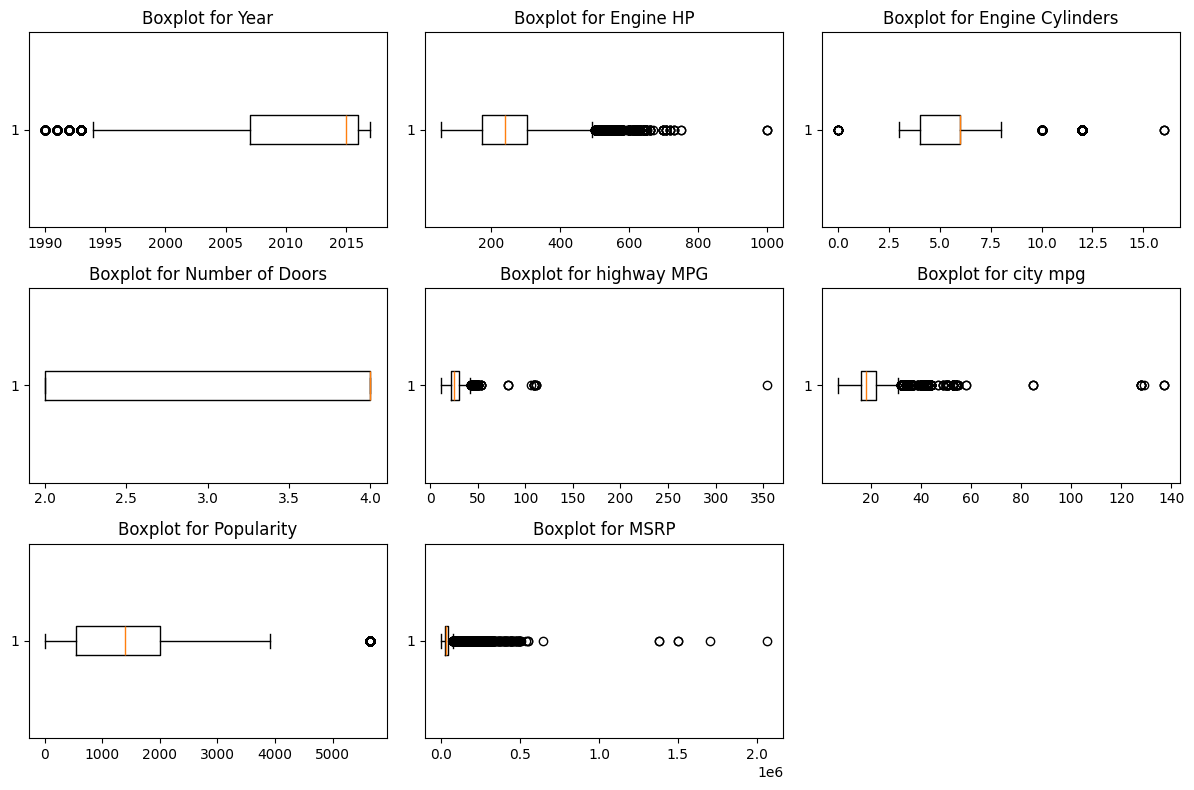

In [22]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

## Price based on 

**Engine specs** : Fuel type, horsepower, and cylinder count

## Compare different features with respect to frequency counts

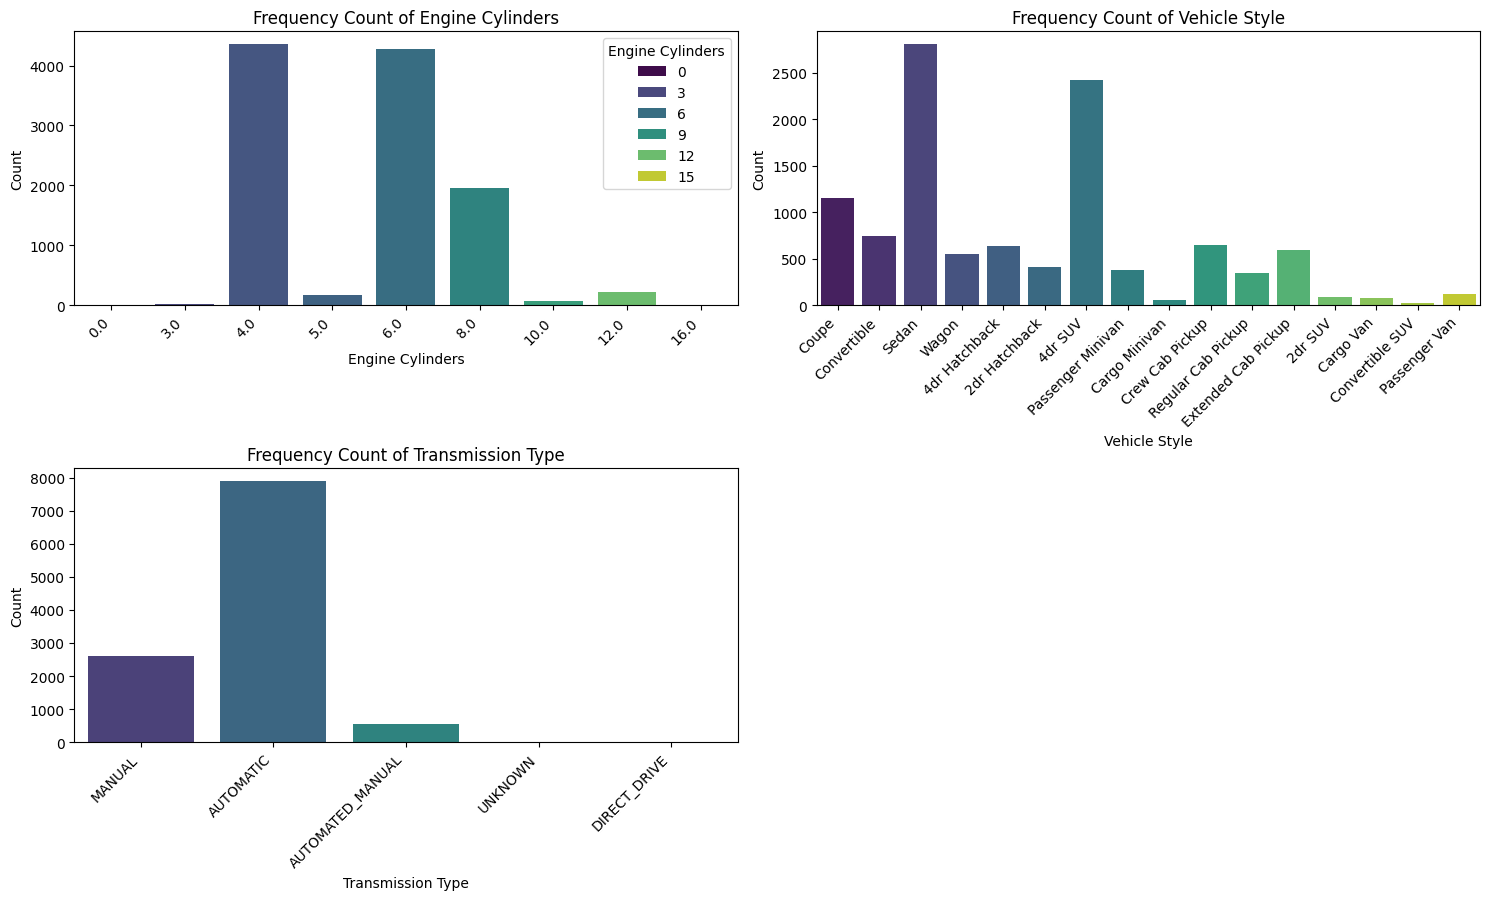

In [23]:
# selecting some important   columns for this
categorical_cols = ['Engine Cylinders',  'Vehicle Style', 'Transmission Type']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], hue=df[col], palette="viridis")
    plt.title(f"Frequency Count of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    
plt.tight_layout()
plt.show()

### Analysis and Intrepretation from these graphs 


- Most vehicles have four or six cylinders, indicating a balance between fuel efficiency and performance, while high-performance engines like 8, 10, 12 cylinders are rare.

- Sedans, SUVs, and Pickup Trucks are the most common vehicle styles, reflecting their market demand.

- Automatic transmissions is  significantly more than manual ones, showing a shift in consumer preference.


## Histograms 

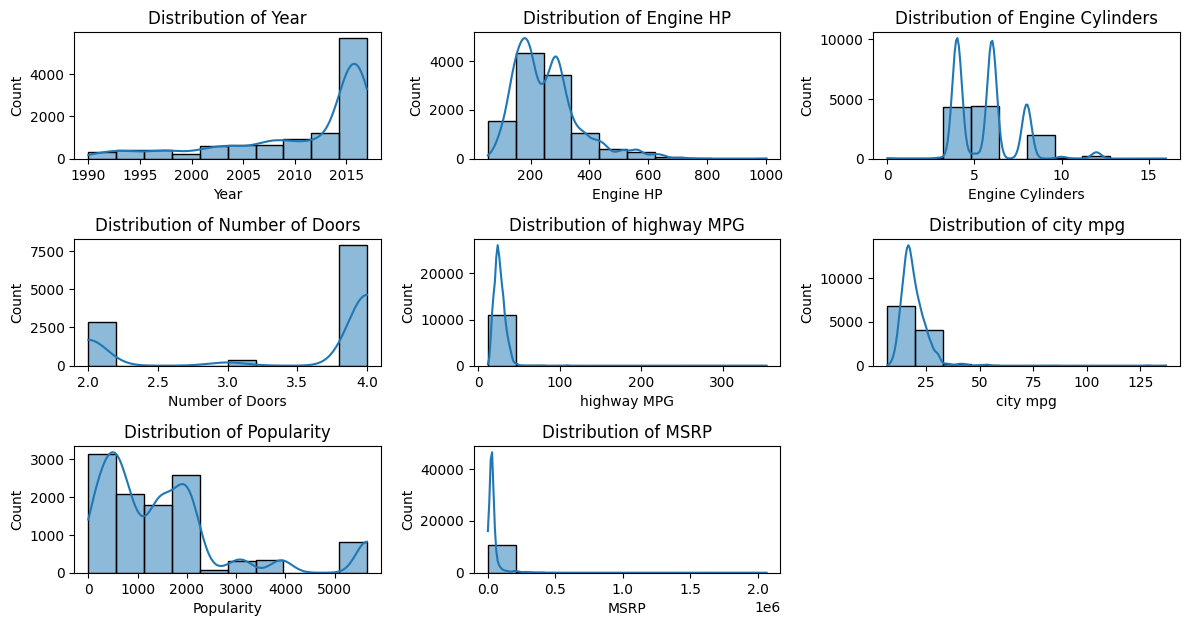

In [24]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes('number'), 1):
    plt.subplot(4, 3, i)
    sns.histplot(data = df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Some important  Intrepretation 


- The distribution of Year shows a significant concentration of vehicles from the years around 2015, with a large increase in counts, suggesting that newer car models dominate the dataset.

- The distribution of Engine HP reveals that most cars in the dataset have horsepower between 150-300 HP, with a few outliers showing cars with very high horsepower.

- The distribution of Popularity shows a wide range of values.This indicates that while some cars have very high popularity.

- Both highway MPG and city mpg distributions show that most cars have lower fuel efficiency, with city MPG values typically below 30 and highway MPG values also concentrated below 40. This indicates that most cars have average to lower fuel efficiency, and only a few cars achieve high MPG ratings.

### Scatter Plot between Engine HP vs MSRP

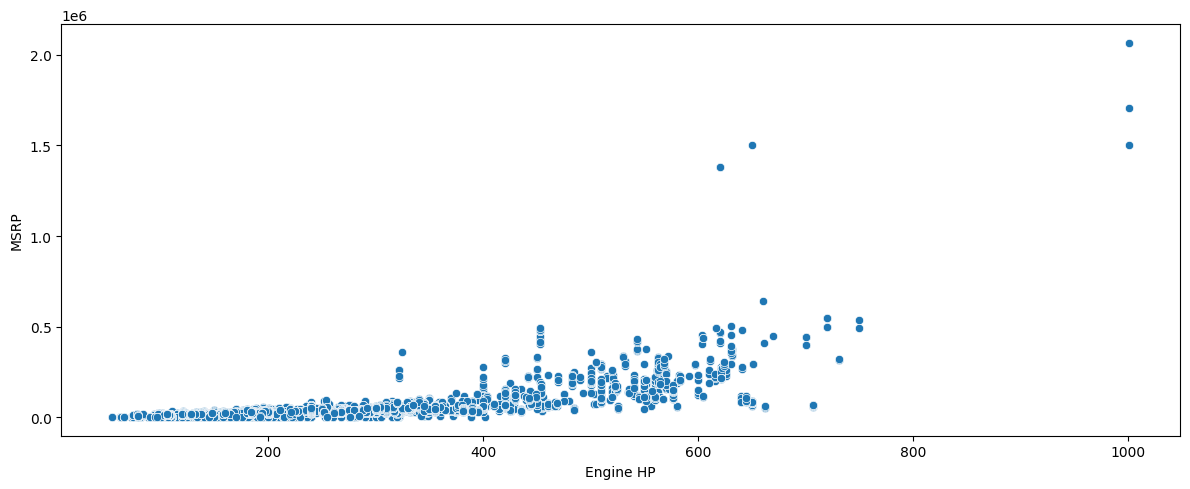

In [25]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = df['Engine HP'], y = df['MSRP'])
plt.tight_layout()
plt.xlabel("Engine HP")
plt.show()

### Analysis and Intrepretation from this graph 

- There seems to be a **positive relation** for this graph.As Engine HP increases, there is a general upward trend in MSRP, indicating that cars with more horsepower tend to have a higher price.

### Scatter plot between Engine HP vs city mpg 

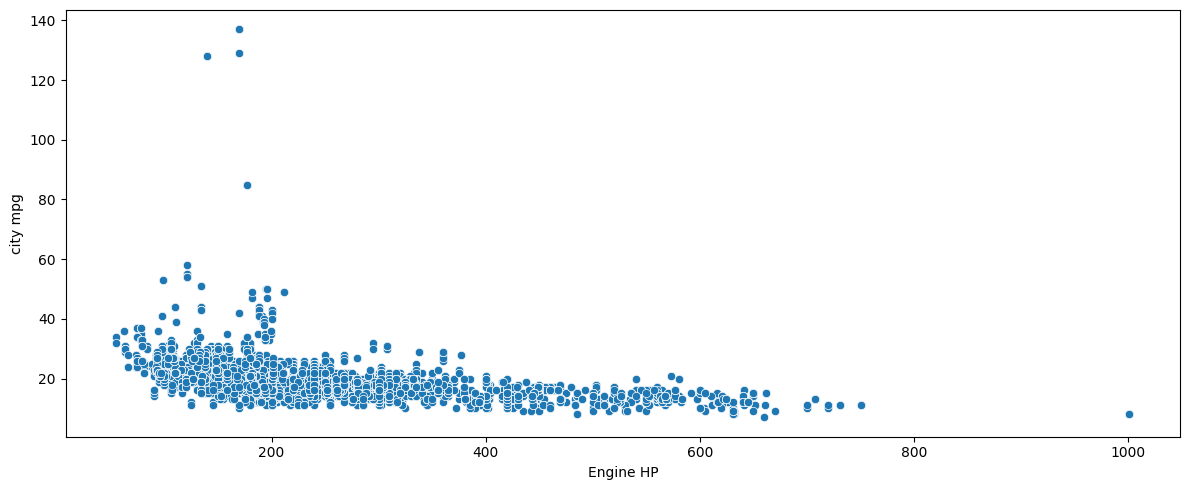

In [26]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = df['Engine HP'], y = df['city mpg'])
plt.tight_layout()
plt.xlabel("Engine HP")
plt.show()

### Analysis and Intrepretation from this graph 


- There seems to be a negative relationship between Engine HP and City MPG. As Engine HP increases, the City MPG tends to decrease, which is typical as more powerful engines often consume more fuel in city driving conditions.


## Heat Map

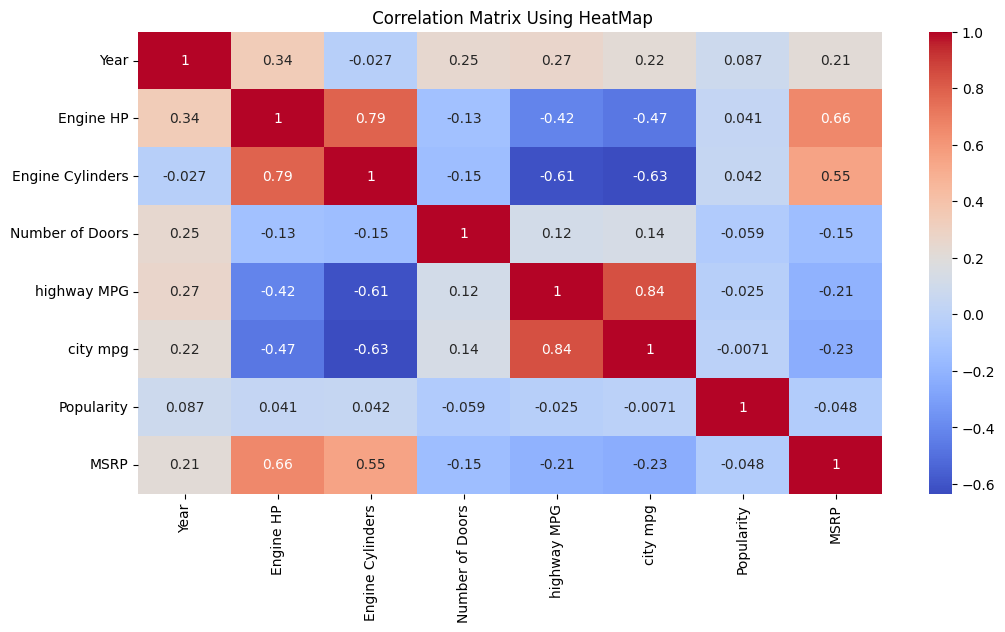

In [27]:
numerical_columns = df.select_dtypes('number').columns
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title(" Correlation Matrix Using HeatMap")
plt.show()

### Some insights:

- Higher horsepower typically results in higher pricing(MSRP), indicating performance level and engine capability.

- Similarly , Engine cylinders also the most impacting factor for pricing(MSRP)

- Engine HP and Engine Cylinders have a high positive correlation (0.81). This indicates that cars with more cylinders tend to have more horsepower, which is typical for more powerful engines.
Highly positively correlated features:


- Both highway MPG (-0.47) and city MPG (-0.51) show a negative correlation with Engine HP, meaning that cars with higher horsepower tend to have lower fuel efficiency in both city and highway driving conditions.


#### Highly correlated 
- Engine HP ↔ Engine Cylinders (0.81)
- highway MPG ↔ city mpg (0.82)

#### Low correlated 
- Popularity ↔ MSRP (-0.055)
- Year ↔ Engine Cylinders (-0.051)



## Considering feature selection based on correlation matrix

## Handling categorical variables

In [28]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [29]:
for column in df.select_dtypes(include='object').columns:
    print(column)
    print(df[column].unique())


Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Bugatti']
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500' '500L' '500X' '550' '560-Class' '570S' '575M' '57'
 '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '626' '62' '650S C

In [30]:
df_encoded = df.copy()


In [31]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [32]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


### Handling for ordinal category

In [34]:
df_encoded['Driven_Wheels'] = (
    df_encoded['Driven_Wheels'].astype('category')
    .cat.set_categories(['rear wheel drive', 'front wheel drive', 'all wheel drive','four wheel drive'])
    .cat.codes
)

df_encoded['Transmission Type'] = (
    df_encoded['Transmission Type'].astype('category')
    .cat.set_categories(['MANUAL', 'AUTOMATIC' ,'AUTOMATED_MANUAL' ,'DIRECT_DRIVE', 'UNKNOWN'])
    .cat.codes
)

df_encoded['Vehicle Size'] = (
    df_encoded['Vehicle Size'].astype('category')
    .cat.set_categories(['Compact' ,'Midsize', 'Large'])
    .cat.codes
)

### Handling categorical variables for nominal category 

In [35]:

le = LabelEncoder()

df_encoded['Make'] = le.fit_transform(df_encoded['Make'])
df_encoded['Vehicle Style'] = le.fit_transform(df_encoded['Vehicle Style'])
df_encoded['Engine Fuel Type'] = le.fit_transform(df_encoded['Engine Fuel Type'])
df_encoded['Model'] = le.fit_transform(df_encoded['Model'])


In [36]:
df_encoded.dtypes

Make                   int32
Model                  int32
Year                   int64
Engine Fuel Type       int32
Engine HP            float64
Engine Cylinders     float64
Transmission Type       int8
Driven_Wheels           int8
Number of Doors      float64
Vehicle Size            int8
Vehicle Style          int32
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Baseline model

In [37]:
X = df_encoded.drop(columns = 'MSRP')
y = df_encoded['MSRP']#target 



In [38]:
#creating test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Instantiate the model
model = DecisionTreeClassifier(random_state=0)

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
y_pred = model.predict(X_test)

In [116]:
y_pred

array([33920, 16535, 83295, ..., 34815, 41340,  2000], dtype=int64)

### Applying metrics for Baseline model

In [43]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

baseline_metrics = {
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2
}
print(baseline_metrics)

{'MSE': 154088858.13925192, 'RMSE': 12413.253326153137, 'MAE': 4234.0491212257775, 'R²': 0.9559180662875065}


- R² is 0.956 indicates that approximately 95.6% of the variability in the actual prices is captured by the model.This indicates the strong performance of the model.


## Tune and validate decision trees with Python

In [121]:

tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

# Define a grid of hyperparameters
tree_param = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    
   
}
scoring = {
    'mae': 'neg_root_mean_squared_error',
    'mse': 'neg_mean_absolute_error',
    'r2': 'r2',
    
}
from sklearn.model_selection import KFold
# Gridsearch setup with cross-validation
decision_tree_grid_search = GridSearchCV(estimator=tuned_decision_tree,
                           param_grid=tree_param,
                         cv=KFold(n_splits=5),
                          scoring=scoring,  
                           refit='r2'  # Choose which metric to use for selecting the best model
                          
                           )

In [122]:
%%time
decision_tree_grid_search.fit(X_train, y_train)

CPU times: total: 2min 56s
Wall time: 2min 57s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='r2',
             scoring={'mae': 'neg_root_mean_squared_error',
                      'mse': 'neg_mean_absolute_error', 'r2': 'r2'})

In [115]:
# Best hyperparameters and corresponding score
print("Best Hyperparameters:", decision_tree_grid_search.best_params_)
print("Best Score (R2):", decision_tree_grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score (R2): 0.8764819178472653


Predicting tuned model with best estimators

In [114]:
y_pred_tuned = decision_tree_grid_search.best_estimator_.predict(X_test)

#### Metrics evaluation after tuning

In [108]:
#metrices evaluation 
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(tuned_mse)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_r2 = r2_score(y_test, y_pred_tuned)

tuned_metrics = {
    "MSE": tuned_mse,
    "RMSE": tuned_rmse,
    "MAE": tuned_mae,
    "R²": tuned_r2
}
print(tuned_metrics)

{'MSE': 121695971.33258225, 'RMSE': 11031.58970106223, 'MAE': 4301.255971158179, 'R²': 0.9651850639550308}


## Baseline Model vs Tuned Model comparisons

In [72]:
metrics_df = pd.DataFrame(
    [baseline_metrics.values(), tuned_metrics.values()],
    
    columns=baseline_metrics.keys(),
    
    index=['Baseline Model', 'Tuned Model']
)
metrics_df

,MSE,RMSE,MAE,R²
Baseline Model,1.540889e+08,12413.253326,4234.049121,0.955918
Tuned Model,1.216960e+08,12413.253326,4301.255971,0.965185


## Residual and Error analysis 

####  Comparison of Predicted vs Observed(actual) Values

Creating residuals plots  (differences between predicted and actual values) to identify patterns in errors.

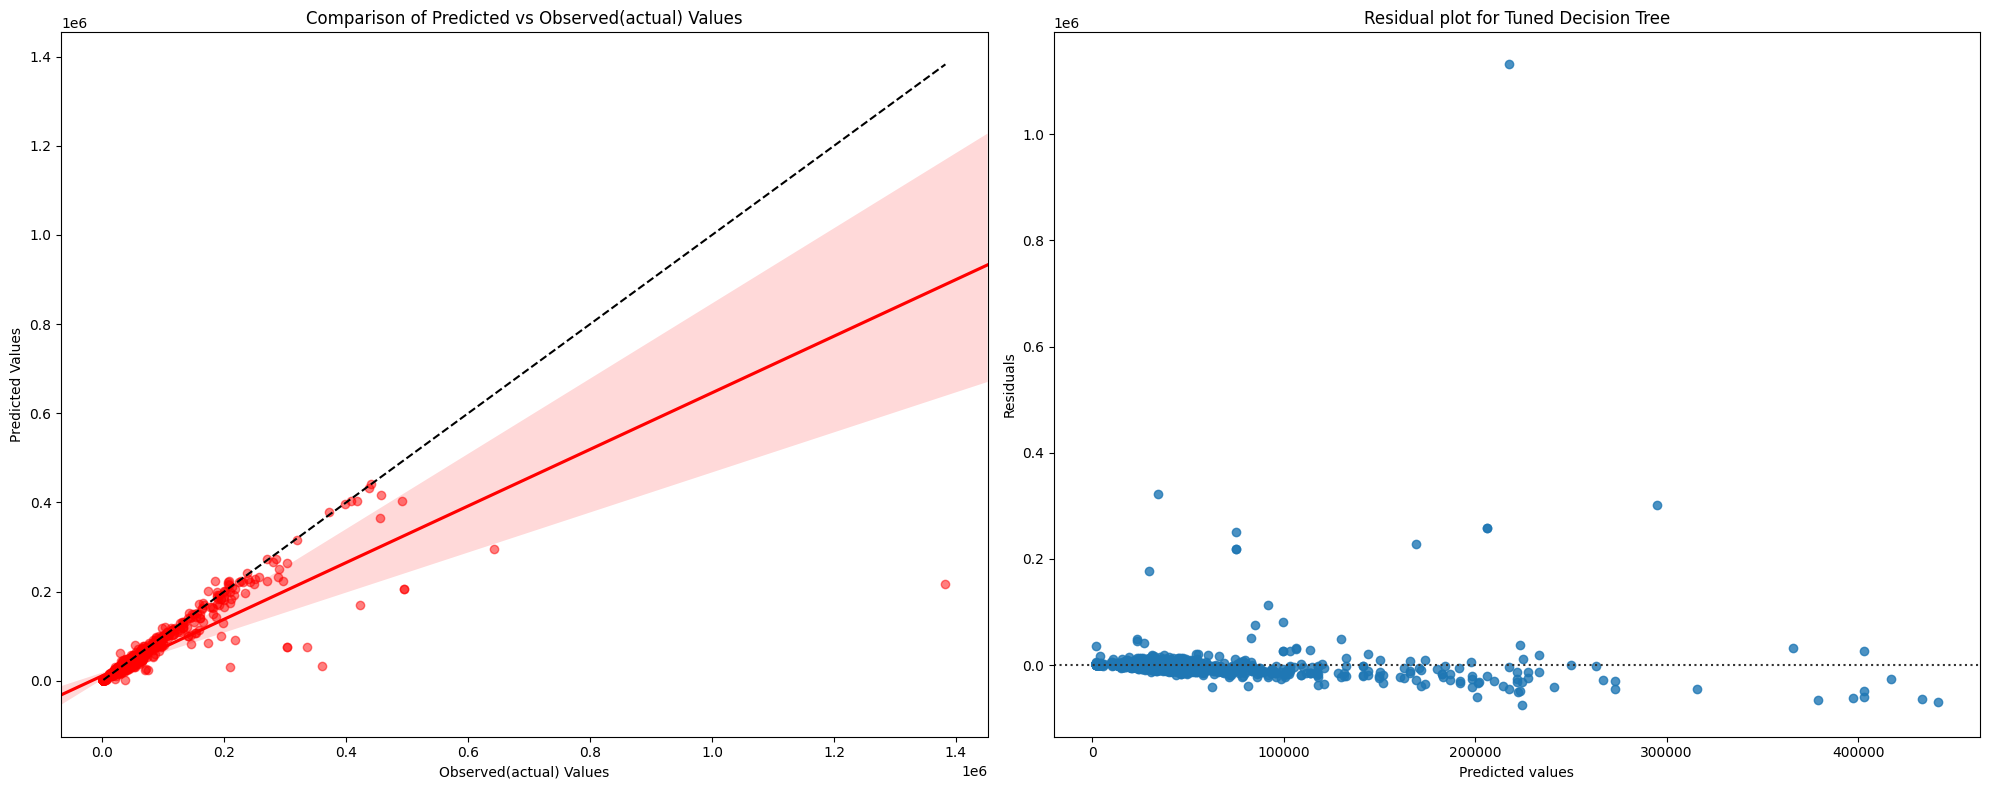

In [ ]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ------------------------Regression plot-------------------------------
sns.regplot(
    x=y_test, 
    y=y_pred_tuned,
    scatter_kws={'color': 'red', 'alpha': 0.5}, 
    line_kws={'color': 'red'},                  
    ci=95,
    truncate=False,
    ax=ax1
)

# Plotting the identity line for reference
min_val = min(min(y_test), min(y_pred_tuned))
max_val = max(max(y_test), max(y_pred_tuned))
ax1.plot([min_val, max_val], [min_val, max_val], '--k', label='Ideal Fit')

ax1.set_xlabel('Observed(actual) Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Comparison of Predicted vs Observed(actual) Values')


# -------------------------------Residual plot-----------------------
residuals = y_test - y_pred_tuned
sns.residplot(x=y_pred_tuned, y=residuals, ax=ax2)

ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual plot')


plt.tight_layout()
plt.show()


### Predicted vs Observed(actual) plot 
- This shows that most of the points  lie closely along the diagonal dashed line which  shows that for the majority of the cars, the predicted prices are very close to the actual prices.

### Predicted vs Residuals
- Most residuals are concentrated near zero, indicating many predictions are close to actual values

## Decision tree split

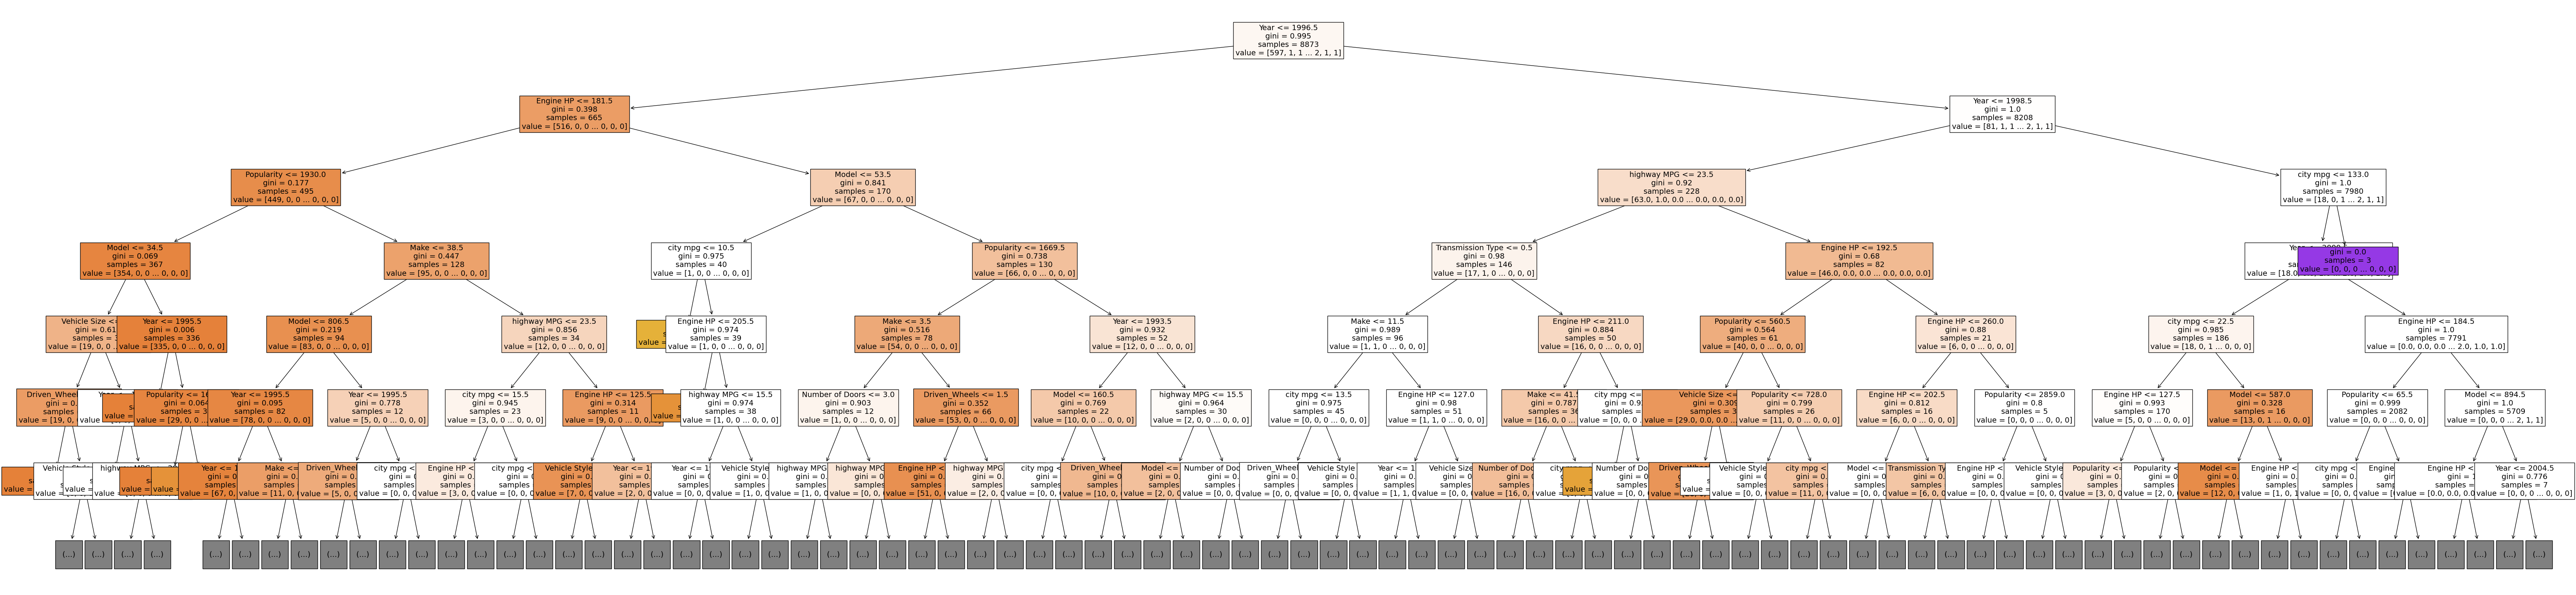

In [103]:
# Plot the tree ()
plt.figure(figsize=(85,20))
plot_tree(model, max_depth=6, fontsize=14, feature_names=X.columns, filled=True)
plt.show()

## Decision tree feature importance

You can also get feature importance from decision trees 

In [ ]:
tree_feature_importances  = pd.DataFrame(decision_tree_grid_search.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_feature_importances  = tree_feature_importances .sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_feature_importances  = tree_feature_importances [tree_feature_importances ['gini_importance'] != 0]
tree_feature_importances 

,gini_importance
Year,0.329854
highway MPG,0.105882
Engine HP,0.095557
city mpg,0.082603
Model,0.080589
Vehicle Style,0.079878
Driven_Wheels,0.050531
Transmission Type,0.035380
Popularity,0.029867
Make,0.027977


#### Creating plot for decision tree feature importances

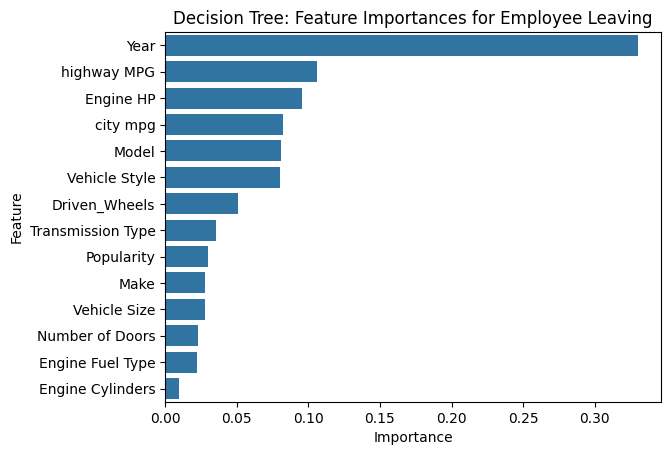

In [105]:
sns.barplot(data=tree_feature_importances, x="gini_importance", y=tree_feature_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Insights 

- `Year` is the most important feature, strongly influencing price predictions.

- `Highway MPG`,` Engine HP`, and `City MPG` also importance feature affecting price

- These variables are most helpful in predicting the outcome variable, `price`, and they are the same as the ones used by the decision tree model.